## Physics 465: Computing Project 4
## Baudouin M. RAMAZANI
#### Investigating the properties of coherent states of the Simple Harmonic Oscillator (SHO).

This week’s project is to investigate the behavior of special superpositions of energy
eigenstates of the simple harmonic oscillator called coherent states. The setup will be
similar to last time, except that the eigenstates in the superposition are SHO eigenstates,
rather then infinite square well eigenstates.

The result is
$$ cn = α^{n}\frac{C_o}{\sqrt{n!}} $$

$$\psi_α = C_0\sum_{n=0}^{\infty}\frac{α^n}{\sqrt{n!}}\psi_n$$

In [25]:
#
# cp4: Starter Code to Computing Project 4: Coherent states.
#

from vpython import *     # import all vpython functions including numpy incompatible sin, cos, exp, etc
from numpy import *       # import all numpy compatible version of functions includign incompatible "rate"
from vpython import rate  # import vpython rate function to replace numpy version
import matplotlib.pyplot as pl


In [36]:
def display(t):
    psi=zeros(len(x),complex)
    i = 0
    while i < NHs:
        psi += exp(-1j*(0.5 + i)*t)*coefs[i]*psis[i]
        i+=1
    psi = psi/sqrt((abs(psi)**2).sum())
    i = 0
    while i < NA:
        SetArrowFromCN(3*psi[i],alist[i])
        i+=1
    Y = (x*(abs(psi)**2)).sum()
    gr.plot(pos=(t, Y))
def SetArrowFromCN( cn, a):
    """
    SetArrowWithCN takes a complex number  cn  and an arrow object  a .
    It sets the  y  and  z  components of the arrow s axis to the real 
    and imaginary parts of the given complex number. 
    
    Just like Computing Project 1, except y and z for real/imag.
    """
    a.axis.y = cn.real
    a.axis.z = cn.imag
    a.axis.x = 0.0
    

In [37]:
canvas()
gd = graph(xtitle="t", ytitle="&lt;x&gt;", width=400, height=300)
gr = gcurve(color=color.black)

h_bar = 1.05e-34
m = 9.1e-31
    
NA=80                          # how many arrows?
a=15.0                         # range of x is -a/2 to a/2 in units 
                               # of $\sqrt{\hbar/m\omega}$
x = linspace(-a/2, a/2, NA)    # NA locations from -a/2 to a/2

NHs=20
hs=zeros((NHs,NA),double)    # the hermite polynomials, an NHs x NA array
coefs=zeros(NHs,double)      # the coherent state coefficients, an NHs x 1 array
psis=zeros((NHs,NA), double) # the stationary states, an NHs x NA array

alpha=sqrt(10)               # <n> = 10.0


hs[0]=0*x + 1.0              # zeroth Hermite Polynomial, H0
hs[1]=2*x                    # first Hermite Polynomial, H1

#
# Compute the first NHs Hermite Polynomials,
# use recurrence relation to get the rest of the Hn(x)
#
# (see e.g., http://en.wikipedia.org/wiki/Hermite_polynomials#Recursion_relation)
#

for n in range(1,NHs-1):
    hs[n+1]=2*x*hs[n] - 2*n*hs[n-1]

#
# Use the coherent state coefficient relation to get the c[n]s.
# avoid overflow by computing them in a loop. Don't worry about 
# the overall factor of c[0] since we'll renormalize our discrete 
# psi array later anyway.
#

coefs[0]=1.0*exp(-alpha**2)
for i in range(1,NHs):
    coefs[i]=coefs[i-1]*alpha/sqrt(i)

#
# Get the stationary states using the hs array and compute the 
# normalization factor in a loop to avoid overflow
#

normFactor = 1.0/pi**0.25
psis[0]=exp(-x**2/2)
for i in range(1,NHs):
    normFactor = normFactor/sqrt(2.0*i)
    psis[i]=normFactor*hs[i]*exp(-x**2/2)
    
#
# Now do the sum to compute the initial wavefunction
#

psi=zeros(len(x),complex)
for m in range(NHs):
    psi += coefs[m]*psis[m]

#
# Normalize!
#

psi=psi/sqrt((abs(psi)**2).sum())

#
# build the arrows. Scale them on the screen by a factor 
# of 3 so they look nice.
#

alist = []
for i in range(NA):
    alist.append(arrow(pos=vec(x[i],0,0), color=color.red))
    SetArrowFromCN(3*psi[i],alist[i])

scene.autoscale = False
t = 0.0
dt = 2*pi/1000.0

rate(30)

#
# After this.. create the "time loop" that animates the wavefunction
# and computes the values for <x> and graphs them. 
#


<IPython.core.display.Javascript object>

In [38]:
if __name__ == "__main__":
    scene.autoscale = False
    t = 0.0
    dt = 2*pi/1000.0
    full_cycle = 2*pi
    while t < 2*full_cycle:
        rate(80)
        display(t)
        t+=dt

### Questions

#### 1) Normalize!
 
$$\psi_α = C_0\sum_{n=0}^{\infty}\frac{α^n}{\sqrt{n!}}\psi_n$$

Let $(\psi_α)^2 = 1$

 $$  C_0^2\sum_{n=0}^{\infty}\frac{α^{2n}}{\sqrt{n!}} = 1$$
 
 $\sum_{n=0}^{\infty}\frac{α^{2n}}{\sqrt{n!}} -> e^{-\alpha^2}$
  $$C_0 = e^{-\alpha^2/2}$$


#### 2)  Show that the expectation value of n is $|\alpha|^2.$
$\sum_{n=0}^{\infty}|C_n|^2n = \sum_{n=0}^{\infty}e^{-\alpha^2}e^{\alpha^2}n = \sum_{n=0}^{\infty}n = |\alpha|^2 $  

#### 3) Find an approximate relationship between the value of the parameter $\alpha$ and the amplitude of the variation in $<x>$ over time.

$E = h\omega(\frac{2n+1}{2}) = h\omega(\frac{2\alpha^2+1}{2}) = h\omega\alpha^2 + \frac{h\omega}{2}$

=> $\frac{1}{2}kx^2 = \alpha^2h\omega$
=> $x = \sqrt{\frac{2h\omega\alpha^2}{k}} = \alpha\sqrt{\frac{2h}{m}} $

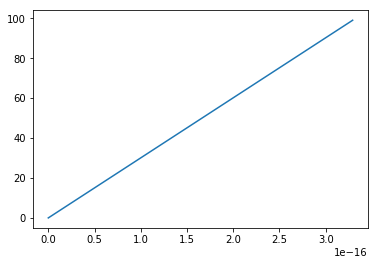

In [48]:
Alpha = range(100)
x = []
for i in range(100):
    x.append(Alpha[i]*sqrt((2*h_bar)/m))
pl.plot(x,Alpha) 
pl.show()


In [47]:
y = 

TypeError: unsupported operand type(s) for /: 'range' and 'int'